# Basic Info Analysis

In [48]:
from ffmpy import FFmpeg, FFprobe

import subprocess
from subprocess import Popen, PIPE

import json
import os
from collections import defaultdict

import pandas as pd


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from IPython.display import display, HTML

In [32]:
result_dict = {
    "train": {
        "video_dir": '/home/tione/notebook/algo-2021/dataset/videos/video_5k/train_5k',
        "feature_dir": '/home/tione/notebook/algo-2021/dataset/tagging/tagging_dataset_train_5k'
    },
    "test": {
        "video_dir": '/home/tione/notebook/algo-2021/dataset/videos/test_5k_2nd',
        "feature_dir": '/home/tione/notebook/algo-2021/dataset/tagging/tagging_dataset_test_5k_2nd'
    }
}

In [33]:
# def video_info(video_path):
#     ff = FFprobe(
#         global_options='-of json -show_streams -select_streams v',
#         inputs={video_path: None},
#     )
    
#     res = ff.run(stdout=PIPE, stderr=PIPE)
#     video_stream = res[0]
    
#     video_detail = json.loads(video_stream).get('streams')[0]

#     # 需要记录的属性
#     # width, height
#     # duration
#     # nb_frames
#     # r_frame_rate
#     return video_detail

In [ ]:
# for data_type in result_dict:
#     data_dir = result_dict[data_type]["video_dir"]
    
#     info_dict = defaultdict(list)
    
#     for idx, item in enumerate(os.listdir(data_dir)):
#         item_path = os.path.join(data_dir, item)
        
#         temp_info = video_info(item_path)
#         for info_item in ['width', 'height', 'duration', 'nb_frames', 'r_frame_rate']:
#             info_dict[info_item].append(temp_info[info_item])

#         info_dict['name'].append(item)

#         if idx % 50 == 0:
#             print(idx)
            
#     result_dict[data_type]['df'] = pd.DataFrame.from_dict(info_dict)
#     result_dict[data_type]['df'].to_csv(f'./eda/{data_type}_video_basic_info.csv')

## Add feature info

In [ ]:
# for data_type in result_dict:
#     ocr_cnt_list = list()
#     ocr_word_cnt_list = list()
#     asr_cnt_list = list()
#     asr_word_cnt_list = list()
#     audio_cnt_list = list()
#     frame_cnt_list = list()
    
#     for idx, row in result_dict[data_type]["df"].iterrows():
#         if idx % 500 == 0:
#             print(idx)
        
#         video_name = row['name'].split('.')[0]
        
#         text_feature_path = os.path.join(result_dict[data_type]["feature_dir"], "text_txt", "tagging", f"{video_name}.txt")
        
#         # text feature
#         temp_data = json.load(open(text_feature_path))
        
#         ocr_word_cnt_list.append(len(temp_data['video_ocr'].replace('|', '')))
#         asr_word_cnt_list.append(len(temp_data['video_asr'].replace('|', '')))
        
#         ocr_length = len(temp_data['video_ocr'].split('|'))
#         asr_length = len(temp_data['video_asr'].split('|'))
        
#         ocr_cnt_list.append(ocr_length)
#         asr_cnt_list.append(asr_length)
        
#         # audio feature
#         audio_feature_path = os.path.join(result_dict[data_type]["feature_dir"], "audio_npy", "Vggish", "tagging", f"{video_name}.npy")
#         try:
#             temp_data = np.load(audio_feature_path)
#             audio_cnt_list.append(temp_data.shape[0])
#         except Exception as e:
#             audio_cnt_list.append(0)
        
#         # video feature
#         if data_type == 'train':
#             extracted_frame_dir = os.path.join('./train_5k', 'frames', video_name)
#         else:
#             extracted_frame_dir = os.path.join('./test_5k_2nd', 'frames', video_name)
        
#         frame_cnt_list.append(len(os.listdir(extracted_frame_dir)))
        
    
#     result_dict[data_type]["df"]["ocr_length"] = ocr_cnt_list
#     result_dict[data_type]["df"]["asr_length"] = asr_cnt_list
#     result_dict[data_type]["df"]["audio_length"] = audio_cnt_list
#     result_dict[data_type]["df"]["frame_length"] = frame_cnt_list
#     result_dict[data_type]["df"]["ocr_word_length"] = ocr_word_cnt_list
#     result_dict[data_type]["df"]["asr_word_length"] = asr_word_cnt_list

#     result_dict[data_type]["df"] = result[data_type]["df"].astype({'duration': 'float', 'nb_frames': 'int32',})

In [75]:
# result_dict["train"]["df"].to_csv('./eda/train_basic_info.csv')
# result_dict["test"]["df"].to_csv('./eda/test_basic_info.csv')

In [59]:
result_dict["train"]["df"] = pd.read_csv('./eda/train_basic_info.csv')
result_dict["test"]["df"] = pd.read_csv('./eda/test_basic_info.csv')

In [72]:
result_dict["train"]["df"].head()

,width,height,duration,nb_frames,r_frame_rate,name,ocr_length,asr_length,audio_length,frame_length,ocr_word_length,asr_word_length
0,1920,1080,36.600000,915,25/1,3b863c2504de7daea26a34946f84bcdd.mp4,141,2,38,148,1426,246
1,640,480,29.416992,706,24/1,1ac06bdc113639cb98cad0866a290c4c.mp4,19,3,30,119,185,142
2,1280,720,57.500000,1725,30/1,75c0fade7fc974b19f92ed6a667e5287.mp4,60,7,59,232,353,235
3,1280,720,38.720000,968,25/1,5934695826b00d02eb51e3af138245a7.mp4,36,4,40,156,282,180
4,720,1280,49.160000,1229,25/1,a828eb0b212869fa5feb1a50160f7a5f.mp4,49,7,51,198,250,236


In [53]:
result_dict["test"]["df"].head()

,width,height,duration,nb_frames,r_frame_rate,name,ocr_length,asr_length,audio_length,frame_length
0,1280,720,50.480000,1262,25/1,01c06c6424082915a92726a2f04d5733.mp4,39,3,52,204
1,1280,720,30.800000,770,25/1,030f4dde16c757b5648da1b199a30c3e.mp4,37,3,32,125
2,720,1280,59.240000,1481,25/1,03137ae5e1d7f173252e8851531b5624.mp4,51,6,61,239
3,720,1280,57.850000,1387,24000/1001,0318424347d774903980fcdbdf99b885.mp4,69,5,60,233
4,1280,720,44.500000,1068,24/1,041520688b378f9771972d38b30b1f43.mp4,50,2,46,180


<AxesSubplot:xlabel='audio_length', ylabel='Count'>

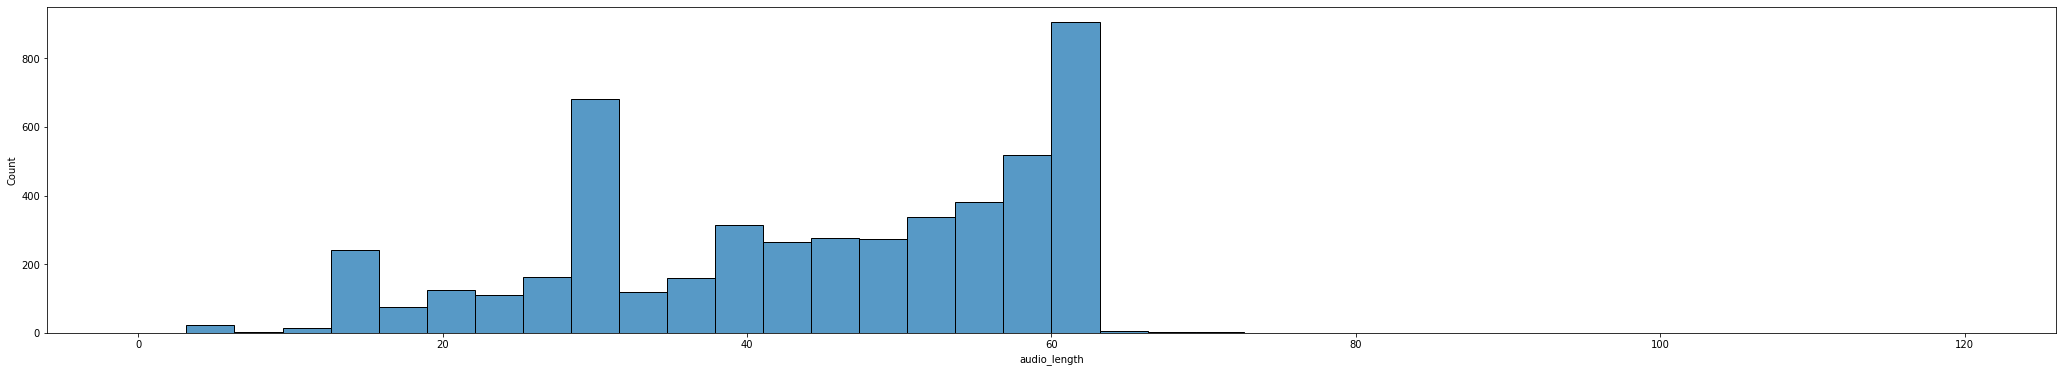

In [54]:
plt.figure(figsize=(36, 6))
# plt.xticks(rotation=90)
sns.histplot(data=result_dict["train"]["df"], x="audio_length")

<AxesSubplot:xlabel='audio_length', ylabel='Count'>

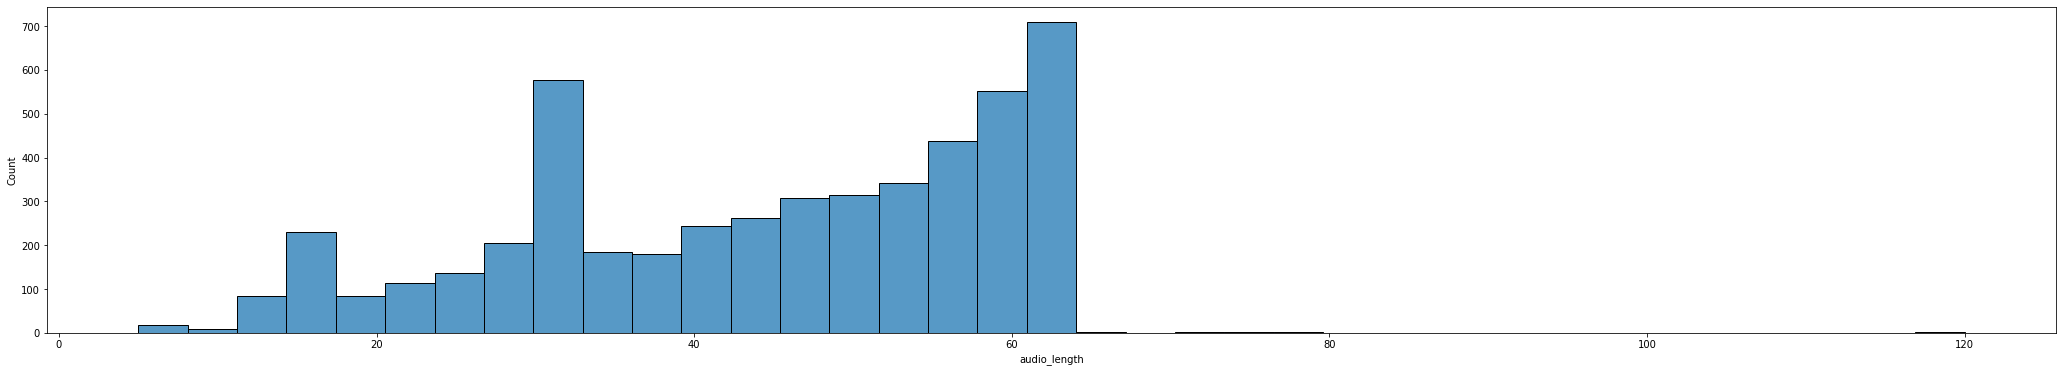

In [55]:
plt.figure(figsize=(36, 6))
# plt.xticks(rotation=90)
sns.histplot(data=result_dict["test"]["df"], x="audio_length")

<AxesSubplot:xlabel='frame_length', ylabel='Count'>

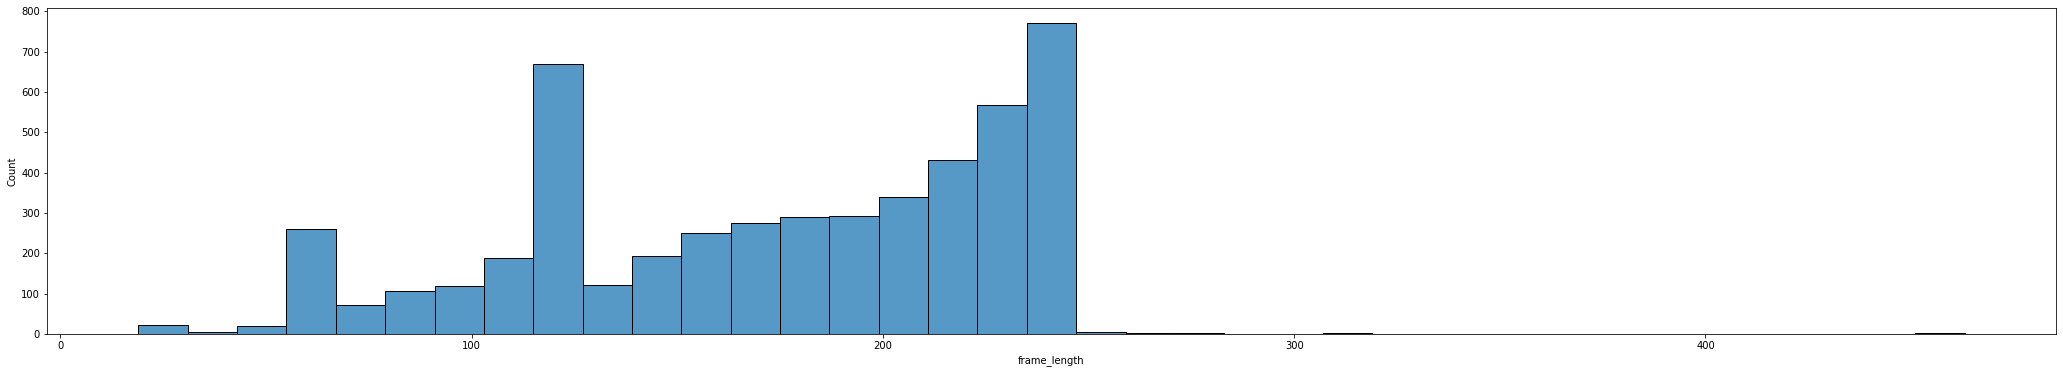

In [56]:
plt.figure(figsize=(36, 6))
# plt.xticks(rotation=90)
sns.histplot(data=result_dict["train"]["df"], x="frame_length")

<AxesSubplot:xlabel='frame_length', ylabel='Count'>

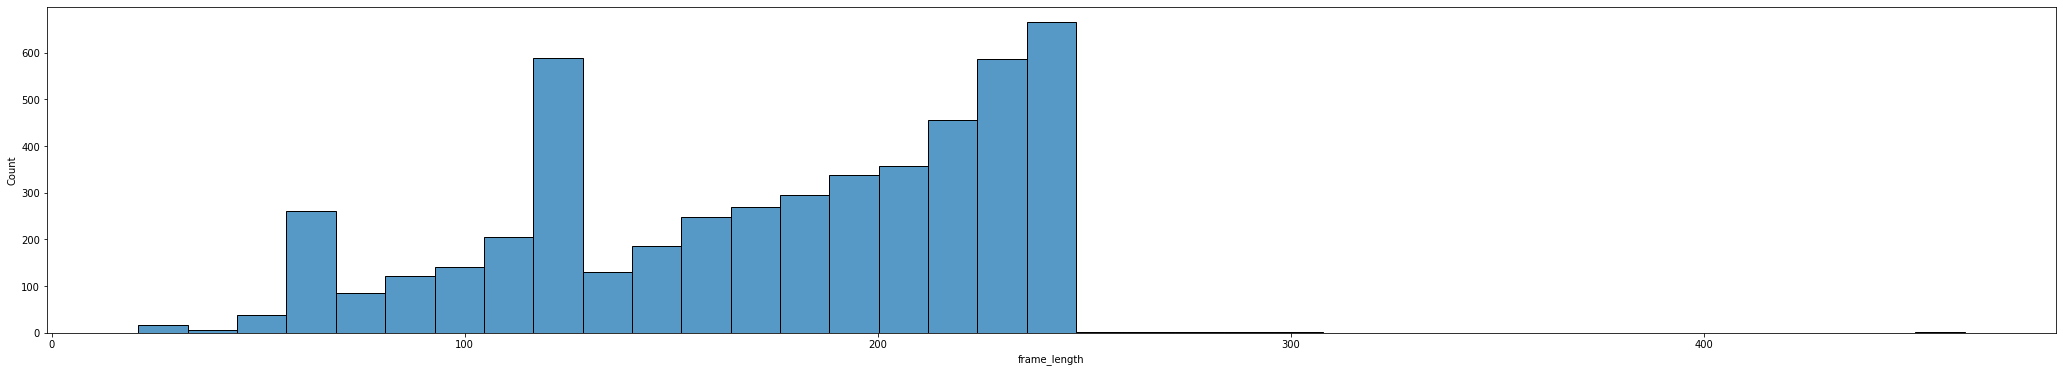

In [57]:
plt.figure(figsize=(36, 6))
# plt.xticks(rotation=90)
sns.histplot(data=result_dict["test"]["df"], x="frame_length")

<AxesSubplot:xlabel='ocr_length', ylabel='Count'>

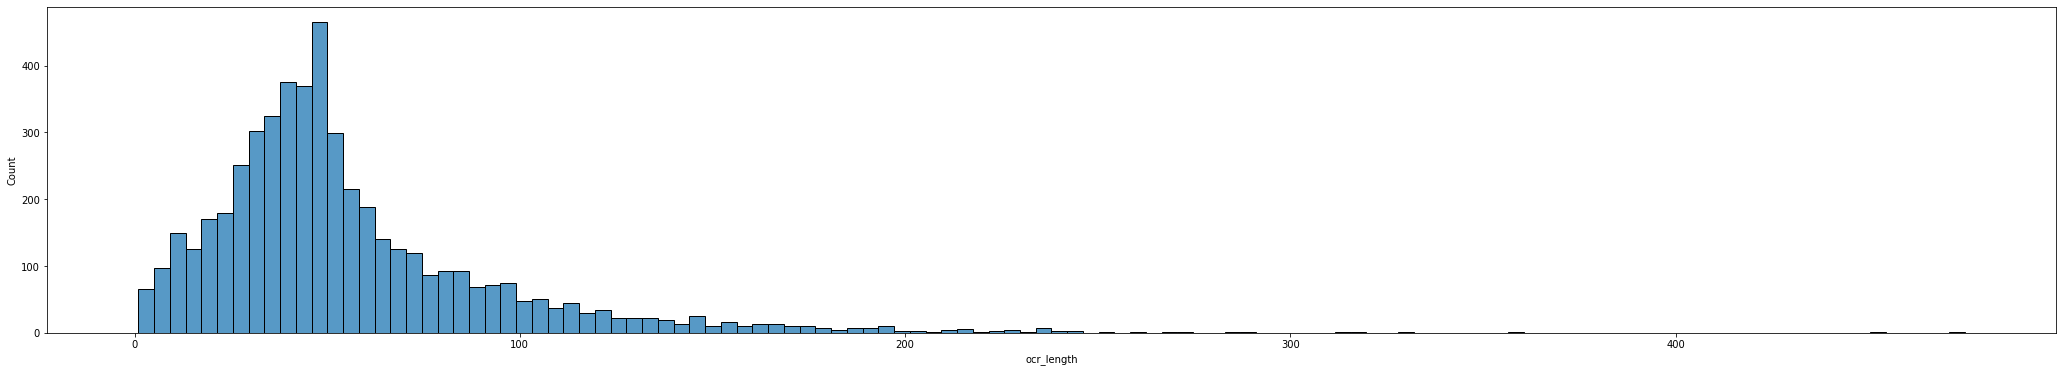

In [42]:
plt.figure(figsize=(36, 6))
# plt.xticks(rotation=90)
sns.histplot(data=result_dict["train"]["df"], x="ocr_length")

<AxesSubplot:xlabel='asr_length', ylabel='Count'>

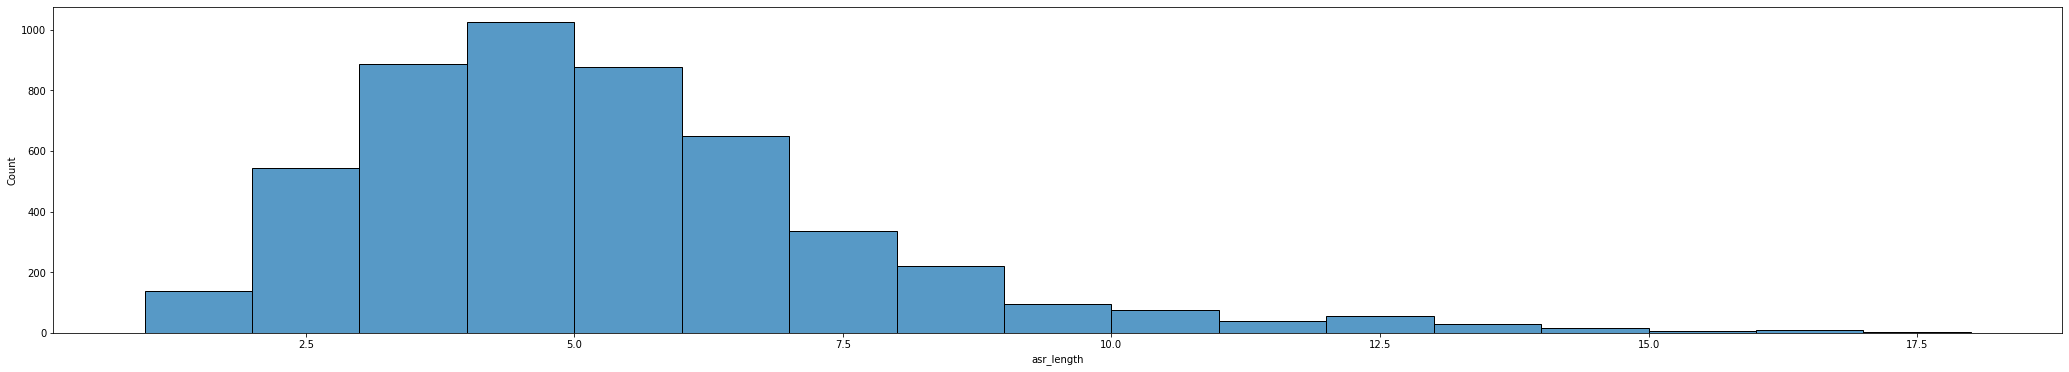

In [47]:
plt.figure(figsize=(36, 6))
# plt.xticks(rotation=90)
sns.histplot(data=result_dict["train"]["df"], x="asr_length", binwidth=1)

<AxesSubplot:xlabel='ocr_length', ylabel='Count'>

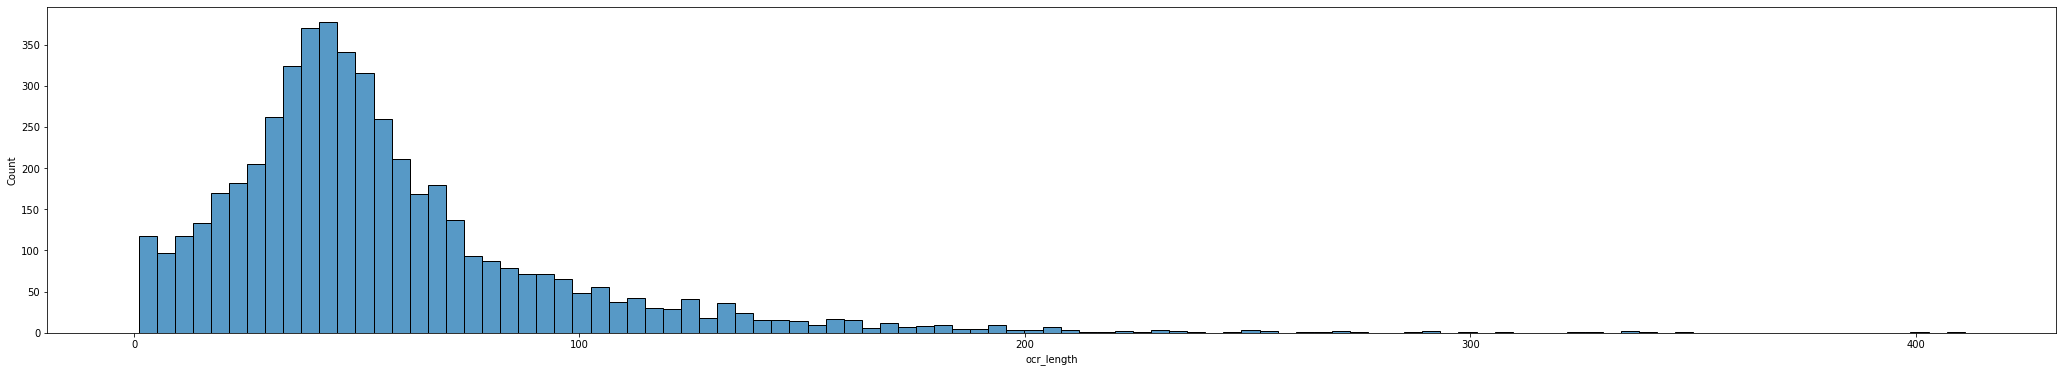

In [44]:
plt.figure(figsize=(36, 6))
# plt.xticks(rotation=90)
sns.histplot(data=result_dict["test"]["df"], x="ocr_length")

<AxesSubplot:xlabel='asr_length', ylabel='Count'>

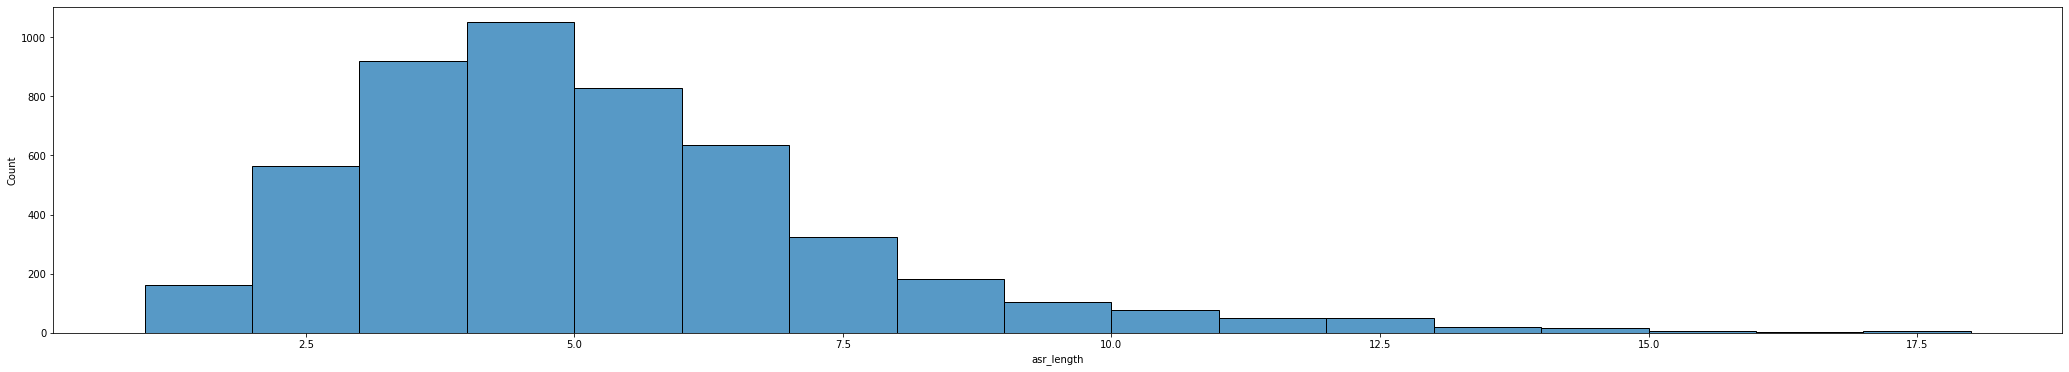

In [46]:
plt.figure(figsize=(36, 6))
# plt.xticks(rotation=90)
sns.histplot(data=result_dict["test"]["df"], x="asr_length", binwidth=1)

## Caluclate correlation

In [73]:
result_dict["train"]["df"].corr()

,width,height,duration,nb_frames,ocr_length,asr_length,audio_length,frame_length,ocr_word_length,asr_word_length
width,1.000000,-0.146690,0.289048,0.220625,0.099510,0.182466,0.288245,0.289113,0.047185,0.209710
height,-0.146690,1.000000,0.156918,0.139469,0.214278,0.099267,0.156861,0.156997,0.135809,0.145768
duration,0.289048,0.156918,1.000000,0.673754,0.337825,0.515869,0.999442,0.999987,0.219726,0.808340
nb_frames,0.220625,0.139469,0.673754,1.000000,0.230739,0.352621,0.672928,0.673821,0.151444,0.561411
ocr_length,0.099510,0.214278,0.337825,0.230739,1.000000,0.045052,0.337140,0.337859,0.813742,0.341257
asr_length,0.182466,0.099267,0.515869,0.352621,0.045052,1.000000,0.515806,0.515814,0.000271,0.187100
audio_length,0.288245,0.156861,0.999442,0.672928,0.337140,0.515806,1.000000,0.999423,0.219123,0.808154
frame_length,0.289113,0.156997,0.999987,0.673821,0.337859,0.515814,0.999423,1.000000,0.219734,0.808373
ocr_word_length,0.047185,0.135809,0.219726,0.151444,0.813742,0.000271,0.219123,0.219734,1.000000,0.256461
asr_word_length,0.209710,0.145768,0.808340,0.561411,0.341257,0.187100,0.808154,0.808373,0.256461,1.000000


In [74]:
result_dict["test"]["df"].corr()

,width,height,duration,nb_frames,ocr_length,asr_length,audio_length,frame_length,ocr_word_length,asr_word_length
width,1.000000,-0.207792,0.279545,0.239087,0.098177,0.145769,0.278692,0.279621,0.044801,0.209127
height,-0.207792,1.000000,0.146740,0.149347,0.225365,0.084591,0.147034,0.146845,0.146018,0.138278
duration,0.279545,0.146740,1.000000,0.714294,0.322015,0.516884,0.999803,0.999987,0.186952,0.805451
nb_frames,0.239087,0.149347,0.714294,1.000000,0.259526,0.382440,0.714534,0.714247,0.158878,0.579647
ocr_length,0.098177,0.225365,0.322015,0.259526,1.000000,0.077899,0.322015,0.322050,0.811410,0.311106
asr_length,0.145769,0.084591,0.516884,0.382440,0.077899,1.000000,0.517184,0.516861,0.032226,0.216786
audio_length,0.278692,0.147034,0.999803,0.714534,0.322015,0.517184,1.000000,0.999788,0.187127,0.805303
frame_length,0.279621,0.146845,0.999987,0.714247,0.322050,0.516861,0.999788,1.000000,0.186927,0.805370
ocr_word_length,0.044801,0.146018,0.186952,0.158878,0.811410,0.032226,0.187127,0.186927,1.000000,0.216850
asr_word_length,0.209127,0.138278,0.805451,0.579647,0.311106,0.216786,0.805303,0.805370,0.216850,1.000000
